In [38]:
import os
import matplotlib.pyplot as plt
import scipy.stats

In [39]:
files = [f for f in os.listdir(os.getcwd()) if f.endswith('.log')]
#scipy.stats.spearmanr(x, y)

sents = {}
for f in files:
    sents[f] = {}
    with open(f, 'r') as file:
        wrong = []
        right = []

        for line in file:
            if line.startswith('wrong label:'):
                l = line.strip().split('\t')
                wrong.append([int(l[0][-1]), 
                              float(l[1][7:-1].split(', ')[int(l[0][-1])]),
                              l[2]])
            elif line.startswith('right label:'):
                right.append([int(l[0][-1]), 
                              float(l[1][7:-1].split(', ')[int(l[0][-1])]),
                              l[2]])

    sents[f]['wrong'] = wrong
    sents[f]['right'] = right


In [43]:
# Show 10 sentences for which the models were confident but wrong

for f, v in sents.items():
    print('\n===== ' + f[:-4] + ' =====')
    wrong_telic = []
    wrong_atelic = []
    for sent in v['wrong']:
        if sent[0] == 0 and sent[1] > 0.8:
            wrong_telic.append(sent[2])
        elif sent[0] == 1 and sent[1] > 0.8:
            wrong_atelic.append(sent[2])
            
    #print('Wrong Telic:')
    #for s in wrong_telic[:10]: 
    #    print('\t', s)
    
    print('\nWrong Atelic:')
    for s in wrong_atelic[:10]: 
        print('\t', s)


===== telicity_xlnet-base-cased_yes =====

Wrong Atelic:
	  , the Pho en ician s set out from what is now Iran to explore their surroundings  . <sep> <cls>
	 His long  , frequently washed and dried fingers  rum mag ed the whole day through numerous small objects  ,  grat ing  , pounding  , past ing  , tying  , making notes  , and  cra mm ing things into his boxes and shelves  . <sep> <cls>
	 She watched the  psi bob her head  , unaware of the rest of the bridge  , shaking blonde curl s as she chatter ed away with the approaching  psi relay on Mason  ' s ship  . <sep> <cls>
	 Yes  , I know women are all dead keen on marrying men they do  n ' t much like  . <sep> <cls>
	 Never mind that in a regime that is controlled by warlord s  , it does not matter who is authorized to distribute the aid  - - the ruling regional warlord s will seize control of it and use it to their own advantage  . <sep> <cls>
	 I was outraged  , but he was right  ; The  od our of the food diffuse s up into the nasa


telicity_xlnet-base-cased_yes


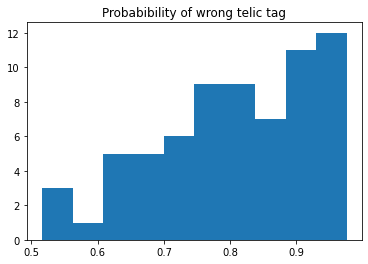

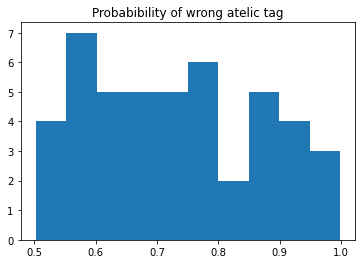


telicity_albert-base-v2_no


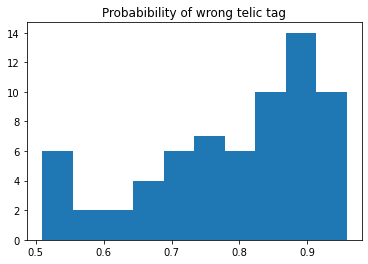

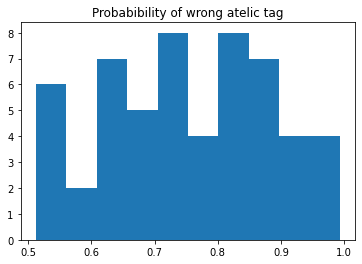


telicity_flaubert_base_uncased_no


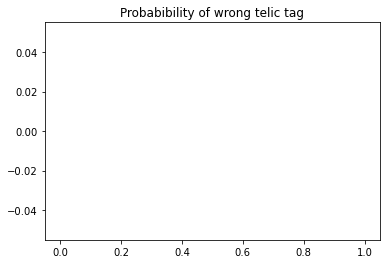

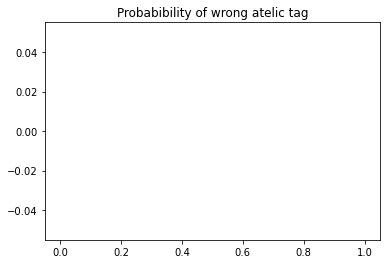


telicity_bert-base-cased_yes


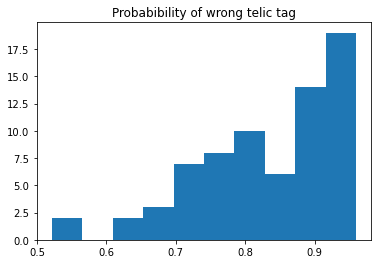

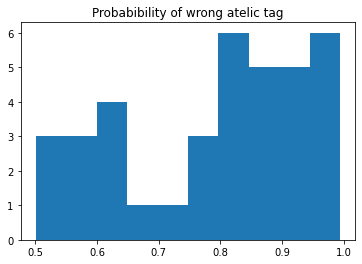


telicity_bert-base-uncased_no


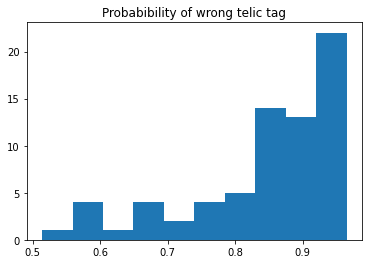

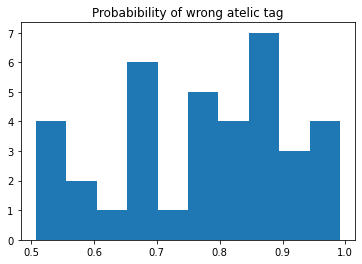


duration_camembert-base_no


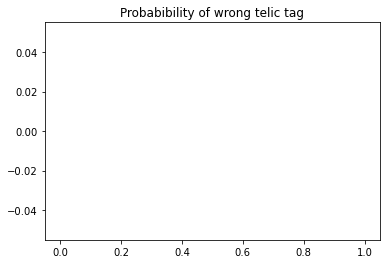

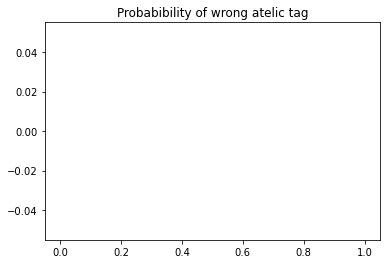


telicity_roberta-base_no


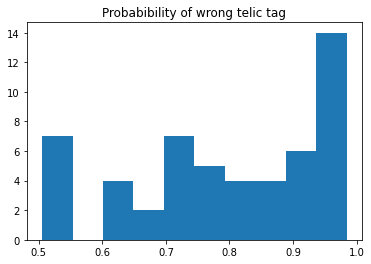

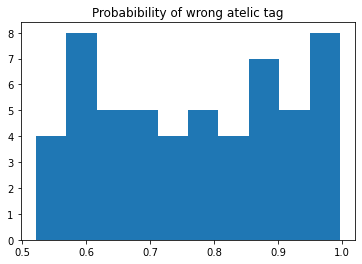


telicity_bert-base-uncased_yes


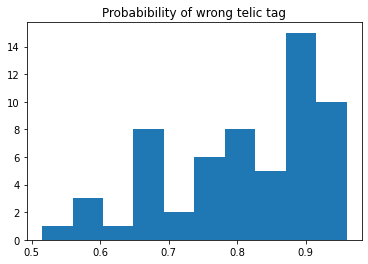

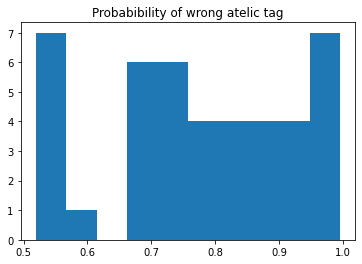


telicity_albert-base-v2_yes


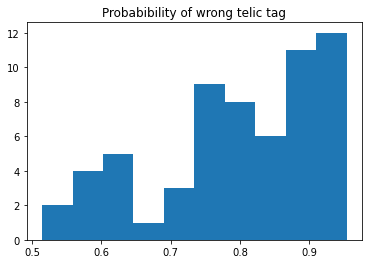

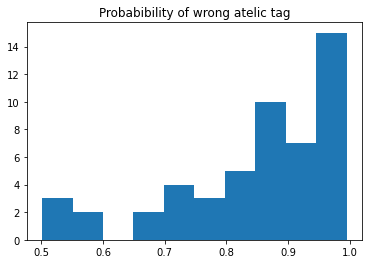


telicity_bert-base-cased_no


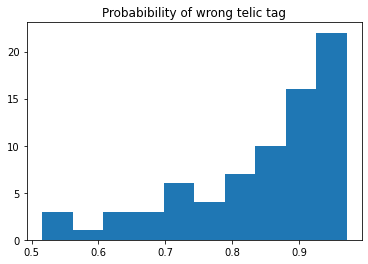

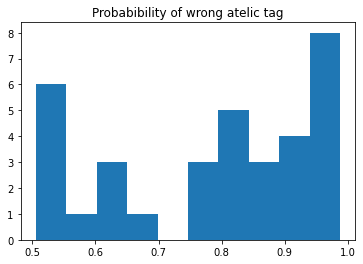


telicity_xlnet-base-cased_no


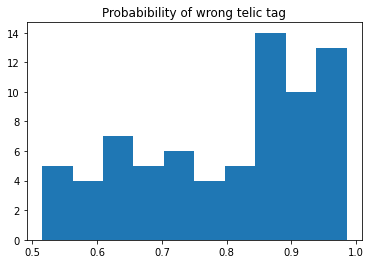

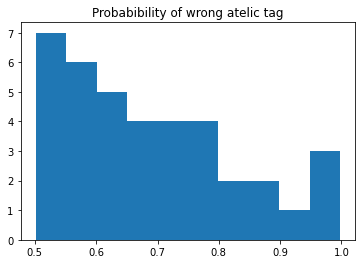

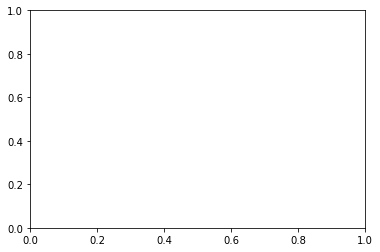

In [45]:
for f, v in sents.items():
    print()
    print(f[:-4])
    wrong_telic = []
    wrong_atelic = []
    for sent in v['wrong']:
        if sent[0] == 0:
            wrong_telic.append(sent[1])
        else:
            wrong_atelic.append(sent[1])
            

    plt.title('Probabibility of wrong telic tag')
    plt.hist(wrong_telic)
    plt.show()
    plt.cla()

    plt.title('Probabibility of wrong atelic tag')
    plt.hist(wrong_atelic)
    plt.show()
    plt.cla()